https://archive.ics.uci.edu/dataset/45/heart+disease

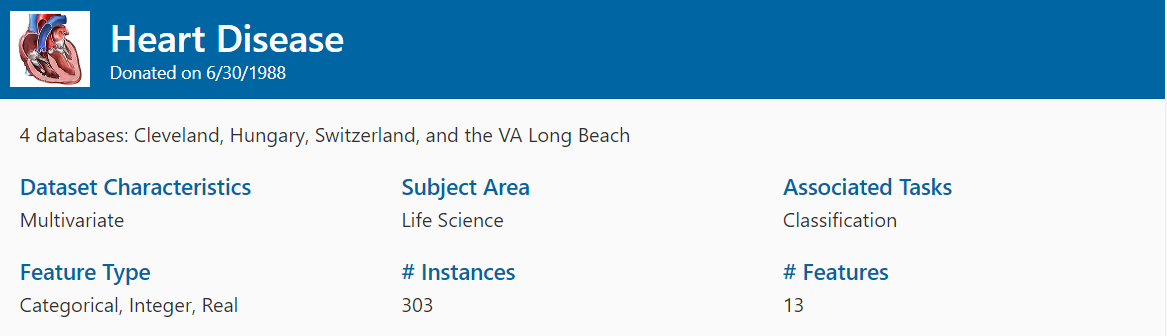


## Data Understanding
1.   age: Umur dalam tahun
2.   sex: jenis kelamin

>
        -- Value 1: Pria
        -- Value 0: wanita
3.   cp: chest pain type (tipe penyakit dada)

>
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4.   trestbps: tekanan darah (dalam mm Hg)
5.   chol: kolestrol (dalam mg/dl)
6.   fbs: (gula darah > 120 mg/dl)

>
        -- Value 1: true
        -- Value 0: false
7.   restecg: hasil kondisi ECG pasien saat sedang istirahat

>


        -- Value 0: normal
        -- Value 1: adanya gelombang abnormal(T wave depression of > 0.05 mV)
        -- Value 2: adanya pembesaran ventrikel kiri (left ventricular hypertrophy) berdasarkan kriteria Estes.
8.   thalach: detak jantung maksimal yang diraih permenit
9.   exang: nyeri dada setelah berolahraga

>
        -- Value 0: no
        -- Value 1: yes
10.  oldpeak:  penurunan segment ST pada elektrokardiogram (EKG) yang terjadi selama tes latihan fisik
11.  slope: tkemiringan segmen ST selama uji latihan fisik pada elektrokardiogram (EKG)

>


        -- Value 1: upsloping / Kemiringan Naik
        -- Value 2: flat /  Datar
        -- Value 3: downsloping / Kemiringan Turun

12.  ca: jumlah pembuluh darah utama yang ditemukan dalam gambaran angiografi koroner yang diwarnai dengan fluoroskopi
13. thal: stress test atau tes latihan stres thallium, mengevaluasi aliran darah ke otot jantung selama latihan fisik dan pada istirahat

>
        -- Value 3: Normal
        -- Value 6: (Fixed Defect) adanya daerah yang tidak mendapatkan aliran darah yang memadai


## Class
num: diagnosis penyakit jantung
        

>
        -- Value 0: < 50%; mengindikasikan bahwa penyempitan diameter arteri koroner adalah kurang dari 50%. Dengan kata lain, tidak ada penyumbatan arteri koroner yang signifikan.
        -- Value 1: > 50% mengindikasikan bahwa penyempitan diameter arteri koroner adalah lebih dari 50%. Ini menunjukkan adanya penyumbatan atau penyakit arteri koroner yang signifikan.


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print(heart_disease.metadata)
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

### Identifikasi missing values

In [ ]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

### Jumlah data pada tiap kelas

In [ ]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
dtype: int64

#Preprocessing

## Imputasi missing values dengan KNN

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(X)

imputed_df = pd.DataFrame(imputed_data, columns=X.columns)


In [ ]:
imputed_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [ ]:
imputed_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

# Normalizing

##MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(imputed_df)

imputed_df = pd.DataFrame(scaled_data, columns=imputed_df.columns)


imputed_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imputed_df, y, test_size=0.2, random_state=42)

#Modeling

## Random Forest

In [ ]:
compare_result = {}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
store_acc = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train, y_train.values.ravel())
  y_pred_rf = rf.predict(x_test)
  acc = accuracy_score(y_test, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc.index(max(store_acc))+1} dengan akurasi= {max(store_acc)}')
compare_result['Random Forest'] = max(store_acc)

Akurasi terbaik terletak pada estimator=1 dengan akurasi= 0.5409836065573771


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train, y_train.values.ravel())
y_pred_mlp = mlp.predict(x_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result['Neural Network'] = accuracy_mlp

Neural Network Accuracy: 0.4098360655737705


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000, C=0.1)


logistic_regression.fit(x_train, y_train.values.ravel())

y_pred_lr = logistic_regression.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
compare_result['Logistic Regression'] = accuracy_lr

Logistic Regression Accuracy: 0.5081967213114754


## XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train, y_train.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result['XGBoost'] = accuracy_xgb

XGBoost Accuracy: 0.4918032786885246


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train.values.ravel())
y_pred_nb = nb_classifier.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
compare_result['Naive Bayes'] = accuracy_nb

Naive Bayes Accuracy: 0.5081967213114754


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(x_train, y_train.values.ravel())
y_pred_svm = svm_classifier.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
compare_result['SVM'] = accuracy_svm

SVM Accuracy: 0.5409836065573771


# Balancing the data with SMOTE

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(imputed_df, y)


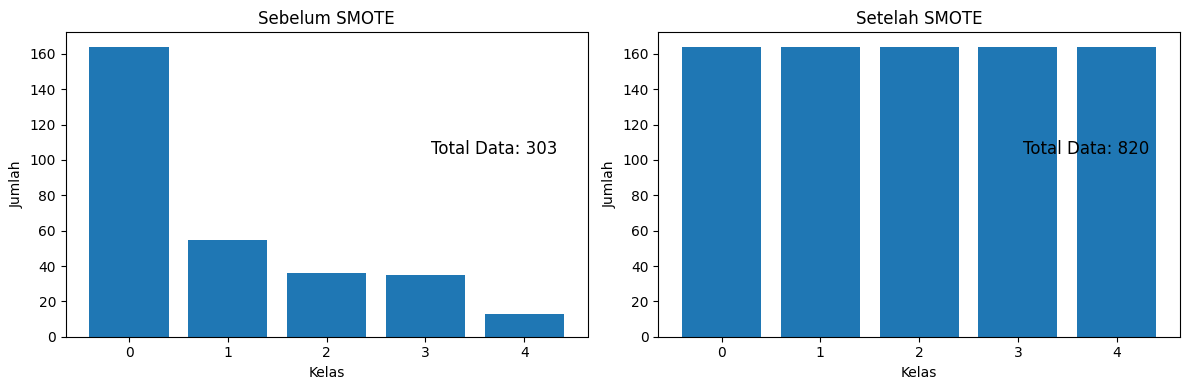

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(range(len(y.value_counts())), y.value_counts().values)
ax1.set_xlabel('Kelas')
ax1.set_ylabel('Jumlah')
ax1.set_title('Sebelum SMOTE')

ax2.bar(range(len(y_resampled.value_counts())), y_resampled.value_counts().values)
ax2.set_xlabel('Kelas')
ax2.set_ylabel('Jumlah')
ax2.set_title('Setelah SMOTE')

total_data_before = y.shape[0]
total_data_after = y_resampled.shape[0]
ax1.annotate(f"Total Data: {total_data_before}", xy=(0.7, 0.6), xycoords='axes fraction', fontsize=12)
ax2.annotate(f"Total Data: {total_data_after}", xy=(0.7, 0.6), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

## Random Forest - SMOTE

In [ ]:
store_acc = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_resampled, y_train_resampled.values.ravel())
  y_pred_rf = rf.predict(x_test_resampled)
  acc = accuracy_score(y_test_resampled, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc.index(max(store_acc))+1} dengan akurasi= {max(store_acc)}')
compare_result['Random Forest - SMOTE'] = max(store_acc)

Akurasi terbaik terletak pada estimator=11 dengan akurasi= 0.8658536585365854


## XGBoost - SMOTE

In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_resampled)

accuracy_xgb = accuracy_score(y_test_resampled, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result['XGBoost - SMOTE'] = accuracy_xgb

XGBoost Accuracy: 0.8719512195121951


## Neural Network - SMOTE

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_resampled, y_train_resampled.values.ravel())
y_pred_mlp = mlp.predict(x_test_resampled)

accuracy_mlp = accuracy_score(y_test_resampled, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result['Neural Network - SMOTE'] = accuracy_mlp

Neural Network Accuracy: 0.8475609756097561


## SVM - SMOTE

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(x_train_resampled, y_train_resampled.values.ravel())
y_pred_svm = svm_classifier.predict(x_test_resampled)

accuracy_svm = accuracy_score(y_test_resampled, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
compare_result['SVM - SMOTE'] = accuracy_svm

SVM Accuracy: 0.5975609756097561


## Logistic Regression - SMOTE

In [ ]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000, C=0.1)


logistic_regression.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_lr = logistic_regression.predict(x_test_resampled)

accuracy_lr = accuracy_score(y_test_resampled, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
compare_result['Logistic Regression - SMOTE'] = accuracy_lr

Logistic Regression Accuracy: 0.5121951219512195


## Naive Bayes - SMOTE

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_nb = nb_classifier.predict(x_test_resampled)

accuracy_nb = accuracy_score(y_test_resampled, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
compare_result['Naive Bayes - SMOTE'] = accuracy_nb

Naive Bayes Accuracy: 0.4268292682926829


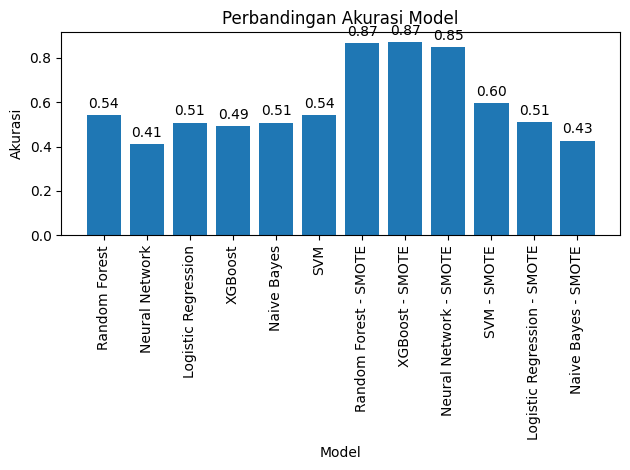

In [ ]:
model_names = list(compare_result.keys())
accuracies = list(compare_result.values())

fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')

for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.annotate(f'{accuracy:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Seleksi Fitur

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [ ]:
fs_method = [['Information Gain', mutual_info_classif], ["Chi-squared", chi2], ["ANOVA", f_classif]]
for i in range(3):
  selector = SelectKBest(fs_method[i][1], k=10)
  X_new = selector.fit_transform(x_resampled, y_resampled.values.ravel())

  selected_features_mask = selector.get_support()
  feature_scores = selector.scores_

  feature_names = x_resampled.columns.values.ravel()
  selected_features = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

  fs_method[i].append(selected_features)
  fs_method[i].append(feature_scores)

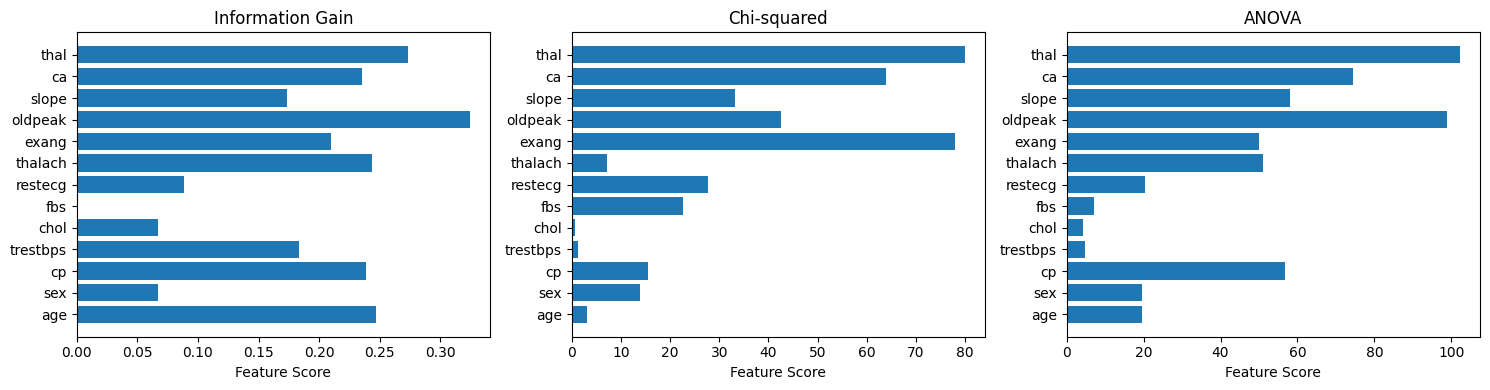

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axes[i].barh(range(len(fs_method[i][3])), fs_method[i][3])
    axes[i].set_yticks(range(len(fs_method[i][3])))
    axes[i].set_yticklabels(feature_names)
    axes[i].set_xlabel('Feature Score')
    axes[i].set_title(f'{fs_method[i][0]}')

plt.tight_layout()
plt.show()


## Information Gain

In [ ]:
df_gain = pd.DataFrame(x_resampled, columns=fs_method[0][2])
df_gain

,age,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,0.000000,0.481132,1.000000,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,0.791667,1.000000,0.622642,1.000000,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,0.791667,1.000000,0.245283,1.000000,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,0.166667,0.666667,0.339623,0.000000,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.250000,0.333333,0.339623,1.000000,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,0.396753,0.590833,0.468239,0.590833,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,0.607979,0.676833,0.179307,1.000000,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,0.546335,1.000000,0.614890,1.000000,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,0.714383,1.000000,0.456028,1.000000,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_gain, x_test_gain, y_train_gain, y_test_gain = train_test_split(df_gain, y_resampled, test_size=0.2, random_state=42)

In [ ]:
compare_result_kbest = {}

In [ ]:
store_acc_gain = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_gain, y_train_gain.values.ravel())
  y_pred_rf = rf.predict(x_test_gain)
  acc = accuracy_score(y_test_gain, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_gain.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_gain.index(max(store_acc_gain))+1} dengan akurasi= {max(store_acc_gain)}')
compare_result_kbest['Random Forest - Gain'] = max(store_acc_gain)

Akurasi terbaik terletak pada estimator=36 dengan akurasi= 0.8353658536585366


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_gain, y_train_gain.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_gain)

accuracy_xgb = accuracy_score(y_test_gain, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Gain'] = accuracy_xgb

XGBoost Accuracy: 0.8109756097560976


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_gain, y_train_gain.values.ravel())
y_pred_mlp = mlp.predict(x_test_gain)

accuracy_mlp = accuracy_score(y_test_gain, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Gain'] = accuracy_mlp

Neural Network Accuracy: 0.8414634146341463


## Chi Squared

In [ ]:
df_chi = pd.DataFrame(x_resampled, columns=fs_method[1][2])
df_chi

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,0.000000,1.0,1.000000,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,1.0,1.000000,0.0,1.000000,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,1.0,1.000000,0.0,1.000000,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,1.0,0.666667,0.0,0.000000,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.0,0.333333,0.0,1.000000,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.590833,0.0,0.590833,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,1.0,0.676833,0.0,1.000000,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,1.0,1.000000,0.0,1.000000,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,1.0,1.000000,0.0,1.000000,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_chi, x_test_chi, y_train_chi, y_test_chi = train_test_split(df_chi, y_resampled, test_size=0.2, random_state=42)

In [ ]:
store_acc_chi = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_chi, y_train_chi.values.ravel())
  y_pred_rf = rf.predict(x_test_chi)
  acc = accuracy_score(y_test_chi, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_chi.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_chi.index(max(store_acc_chi))+1} dengan akurasi= {max(store_acc_chi)}')
compare_result_kbest['Random Forest - Chi'] = max(store_acc_chi)

Akurasi terbaik terletak pada estimator=45 dengan akurasi= 0.8170731707317073


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_chi, y_train_chi.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_chi)

accuracy_xgb = accuracy_score(y_test_chi, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Chi'] = accuracy_xgb

XGBoost Accuracy: 0.8048780487804879


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_chi, y_train_chi.values.ravel())
y_pred_mlp = mlp.predict(x_test_chi)

accuracy_mlp = accuracy_score(y_test_chi, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Chi'] = accuracy_mlp

Neural Network Accuracy: 0.8475609756097561


## ANOVA

In [ ]:
df_anova = pd.DataFrame(x_resampled, columns=fs_method[2][2])
df_anova

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,1.000000,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,0.791667,1.0,1.000000,1.000000,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,0.791667,1.0,1.000000,1.000000,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,0.166667,1.0,0.666667,0.000000,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.250000,0.0,0.333333,1.000000,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,0.396753,1.0,0.590833,0.590833,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,0.607979,1.0,0.676833,1.000000,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,0.546335,1.0,1.000000,1.000000,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,0.714383,1.0,1.000000,1.000000,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_anova, x_test_anova, y_train_anova, y_test_anova = train_test_split(df_anova, y_resampled, test_size=0.2, random_state=42)

In [ ]:
store_acc_anova = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_anova, y_train_anova.values.ravel())
  y_pred_rf = rf.predict(x_test_anova)
  acc = accuracy_score(y_test_anova, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_anova.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_anova.index(max(store_acc_anova))+1} dengan akurasi= {max(store_acc_anova)}')
compare_result_kbest['Random Forest - Anova'] = max(store_acc_anova)

Akurasi terbaik terletak pada estimator=25 dengan akurasi= 0.8475609756097561


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_anova, y_train_anova.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_anova)

accuracy_xgb = accuracy_score(y_test_anova, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Anova'] = accuracy_xgb

XGBoost Accuracy: 0.8353658536585366


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_anova, y_train_anova.values.ravel())
y_pred_mlp = mlp.predict(x_test_anova)

accuracy_mlp = accuracy_score(y_test_anova, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Anova'] = accuracy_mlp

Neural Network Accuracy: 0.8475609756097561


#Perbandingan Hasil Seleksi Fitur

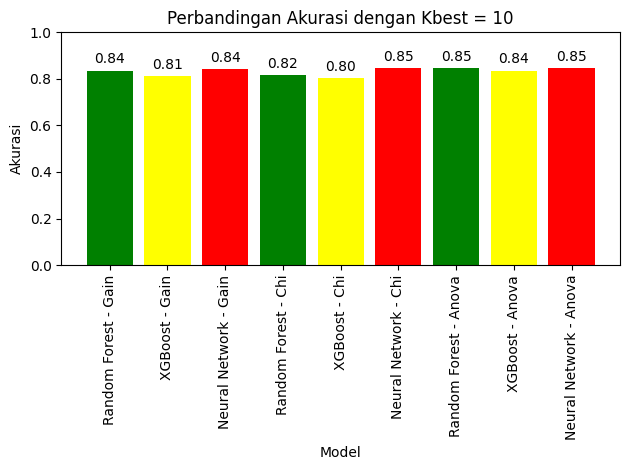

In [ ]:
model_names_kbest = list(compare_result_kbest.keys())
accuracies_kbest = list(compare_result_kbest.values())

fig, ax = plt.subplots()
colors = ['green', 'yellow', 'red']
bars = ax.bar(model_names_kbest, accuracies_kbest, color=colors)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi dengan Kbest = 10')

for bar, accuracy in zip(bars, accuracies_kbest):
    height = bar.get_height()
    ax.annotate(f'{accuracy:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

In [ ]:
rf_result = [compare_result_kbest['Random Forest - Gain'], compare_result_kbest['Random Forest - Chi'], compare_result_kbest['Random Forest - Anova']]
np.std(rf_result)

0.012529296754001997

In [ ]:
xgb_result = [compare_result_kbest['XGBoost - Gain'], compare_result_kbest['XGBoost - Chi'], compare_result_kbest['XGBoost - Anova']]
np.std(xgb_result)

0.013172237191885854

In [ ]:
nn_result = [compare_result_kbest['Neural Network - Gain'], compare_result_kbest['Neural Network - Chi'], compare_result_kbest['Neural Network - Anova']]
np.std(nn_result)

0.002874417809701415

##Model Paling Stabil

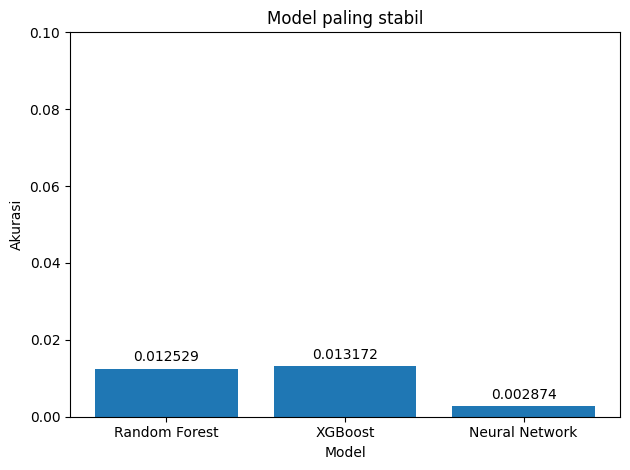

In [ ]:
model_names_stable = ['Random Forest', 'XGBoost', 'Neural Network']
accuracies_stable = [np.std(rf_result), np.std(xgb_result), np.std(nn_result)]

fig, ax = plt.subplots()
bars = ax.bar(model_names_stable, accuracies_stable)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Model paling stabil')

for bar, accuracy in zip(bars, accuracies_stable):
    height = bar.get_height()
    ax.annotate(f'{accuracy:5f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

# plt.xticks(rotation=90)
plt.ylim(0.0, 0.1)
plt.tight_layout()
plt.show()